# ADA - project
# Scala MOOC - Extraction of Learning Navigation Patterns

## Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Configuration

In [2]:
config = {
    'courseName': 'progfun-003',
}

## Data imports

### User Grades

In [3]:
df_User_Grades = pd.read_csv('data/' + config['courseName'] + '_User_Grades.csv')
df_User_Grades = df_User_Grades[['SessionUserID','Grade','AchievementLevel']]
df_User_Grades.head()

,SessionUserID,Grade,AchievementLevel
0,424094493fba6a45fee8303d8f20f6b541792355,0.0,Failed
1,1affff455d4354bf12514fb2a57f9f510dd262a9,0.0,Failed
2,4efa31b50968882d8025724a268ba4942f6b54da,0.0,Failed
3,0139eee5e6b65a62cddf8dae1cde07b1e758be73,0.0,Failed
4,994bb19ed9f821576759585c54e32f4be1fafa51,0.0,Failed


### Assignment Events

In [4]:
df_Problem_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Problem_Events_with_Info.csv',
    dtype={"Grade":np.float64},
    na_values=['None']
)
df_Problem_Event.head(1)

,EventID,ForumUserID,MaximumSubmissions,AccountUserID,SubmissionNumber,Grade,TimeStamp,DataPackageID,ProblemID,SoftCloseTime,ProblemType,HardCloseTime,Platform,OpenTime,EventType,Title,SessionUserID,UniqueProblemID,UniqueUserID
0,080346c36f60b51da4e9e1016cb43152,NaN,0.0,NaN,3,NaN,1379942342,progfun-003,9,2.147484e+09,Video,2.147484e+09,Coursera,0.0,Problem.Check,Lecture 1.4 - Conditionals and Value Definitio...,84afce69e593093fbedc17ce19cb9408787d5dc1,da2b77432237bd969a9d4e478d1e573c,15a799d5d5ba6199e3dc67cb48580d7b


In [5]:
df_Problem_Event = df_Problem_Event[['SessionUserID','Grade','TimeStamp','ProblemID','ProblemType','EventType']]
print(df_Problem_Event.shape)
df_Problem_Event.head()

(445972, 6)


,SessionUserID,Grade,TimeStamp,ProblemID,ProblemType,EventType
0,84afce69e593093fbedc17ce19cb9408787d5dc1,NaN,1379942342,9,Video,Problem.Check
1,72101c44c5b67994a08435218db97edb12587b77,NaN,1380281698,42,Video,Problem.Check
2,76bdedd321a242e1aa792bb2cec9f7cb1b4c0cfc,NaN,1382320248,118,Video,Problem.Check
3,31108a404381184a0d69137be0c8b9d7f803cb08,NaN,1383933547,104,Video,Problem.Check
4,427821f0ed8c8dc5e3c21d100f0db0a955b126bc,NaN,1381261817,60,Video,Problem.Check


In [6]:
df_Problem_Event.ProblemType.value_counts()

Video         346059
Assignment     93798
Quiz              28
Name: ProblemType, dtype: int64

In [7]:
df_Assignment_Event = df_Problem_Event[df_Problem_Event.ProblemType == "Assignment"].dropna()
print(df_Assignment_Event.shape)
df_Assignment_Event.drop('ProblemType',axis=1,inplace=True)
df_Assignment_Event.head()

(93770, 6)


,SessionUserID,Grade,TimeStamp,ProblemID,EventType
352174,17bf18d86b2d7a5b7aa4cbe19816b7b55a50be24,10.00,1384935108,21,Problem.Check
352175,14923ce6698cd77ed1cdaa212f918d2315b507d2,8.67,1383798409,5,Problem.Check
352176,cfcdfcc87288668b7589e29b148f16d1f42c2385,7.85,1382900212,25,Problem.Check
352177,29beb1d096dd4e1f1b6735a75c44ad3b575ed66d,10.00,1380491949,21,Problem.Check
352178,4e26ed5717e85ad5d74800c2810b8fd59aa684a0,9.63,1382913043,22,Problem.Check


In [8]:
df_Assignment_Event['Date'] = pd.to_datetime(df_Assignment_Event.TimeStamp, unit='s')
df_Assignment_Event.head()

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
352174,17bf18d86b2d7a5b7aa4cbe19816b7b55a50be24,10.00,1384935108,21,Problem.Check,2013-11-20 08:11:48
352175,14923ce6698cd77ed1cdaa212f918d2315b507d2,8.67,1383798409,5,Problem.Check,2013-11-07 04:26:49
352176,cfcdfcc87288668b7589e29b148f16d1f42c2385,7.85,1382900212,25,Problem.Check,2013-10-27 18:56:52
352177,29beb1d096dd4e1f1b6735a75c44ad3b575ed66d,10.00,1380491949,21,Problem.Check,2013-09-29 21:59:09
352178,4e26ed5717e85ad5d74800c2810b8fd59aa684a0,9.63,1382913043,22,Problem.Check,2013-10-27 22:30:43


### Video Events

In [9]:
df_Video_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Video_Events.csv',
    na_values=['None']
)
df_Video_Event.head(1)

,EventID,ForumUserID,OldTime,AccountUserID,CurrentTime,SeekType,TimeStamp,DataPackageID,UniqueRowID,TableName,VideoID,Platform,NewSpeed,EventSource,EventType,SessionUserID,NewTime,OldSpeed
0,5298ad53cfb35b012e46f879a7eca3c5,NaN,1059.69,NaN,1059.69,NaN,1381045431,progfun-003,0000024b82b6a7200aa4225849708502,Video_Events,53,coursera,1.0,NaN,Video.Seek,2bddc9fdd71bd7440e87e04bff82d504e0595099,NaN,1.0


In [10]:
df_Video_Event = df_Video_Event[['SessionUserID','TimeStamp','VideoID','EventType']]
print(df_Video_Event.shape)
df_Video_Event.head()

(9579761, 4)


,SessionUserID,TimeStamp,VideoID,EventType
0,2bddc9fdd71bd7440e87e04bff82d504e0595099,1381045431,53,Video.Seek
1,731e5480e4b3b1283af84ffe344e37b759344113,1380274784,37,Video.Seek
2,97ae9f8873d94af81802f0ad22a8d53f340f9df7,1379873932,33,Video.Stalled
3,3229683899078f032f3411008ddf4a11c0098eae,1384162195,83,Video.Download
4,2eaa6c4e803ed6159fd33007ba44e203a6790dbd,1380967922,75,Video.SpeedChange


In [11]:
df_Video_Event['Date'] = pd.to_datetime(df_Video_Event.TimeStamp,unit='s')
df_Video_Event.head()

,SessionUserID,TimeStamp,VideoID,EventType,Date
0,2bddc9fdd71bd7440e87e04bff82d504e0595099,1381045431,53,Video.Seek,2013-10-06 07:43:51
1,731e5480e4b3b1283af84ffe344e37b759344113,1380274784,37,Video.Seek,2013-09-27 09:39:44
2,97ae9f8873d94af81802f0ad22a8d53f340f9df7,1379873932,33,Video.Stalled,2013-09-22 18:18:52
3,3229683899078f032f3411008ddf4a11c0098eae,1384162195,83,Video.Download,2013-11-11 09:29:55
4,2eaa6c4e803ed6159fd33007ba44e203a6790dbd,1380967922,75,Video.SpeedChange,2013-10-05 10:12:02


### Forum Events

In [12]:
df_Forum_Event = pd.read_csv(
    'data/' + config['courseName'] + '_Forum_Events.csv',
    na_values=['None']
)
df_Forum_Event.head(1)

,EventID,ForumUserID,PostID,AccountUserID,TimeStamp,DataPackageID,UniqueRowID,TableName,Platform,EventSource,PostType,EventType,JoinID,SessionUserID
0,fce4235f4f10f964de2ff9ae068276f7,NaN,1374,4614759,1383504875,progfun-003,00001d05c39deb35b62e2d2f6e083683,Forum_Events,coursera,NaN,Thread,Forum.Thread.View,a8d0c63b2f49dd0a85960303ff51d157,NaN


In [13]:
# OMG df_Video_Event does not have 'SessionUserID
df_Forum_Event.SessionUserID.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SessionUserID, dtype: float64

In [14]:
df_Forum_Event = df_Forum_Event[['AccountUserID','TimeStamp','EventType']]
print(df_Forum_Event.shape)
df_Forum_Event.head()

(788672, 3)


,AccountUserID,TimeStamp,EventType
0,4614759,1383504875,Forum.Thread.View
1,80135,1380567303,Forum.Load
2,1026051,1379862686,Forum.Load
3,1913592,1383018165,Forum.Post.CommentOn
4,4405119,1383336975,Forum.Load


In [15]:
df_Forum_Event['Date'] = pd.to_datetime(df_Forum_Event.TimeStamp,unit='s')
df_Forum_Event.head()

,AccountUserID,TimeStamp,EventType,Date
0,4614759,1383504875,Forum.Thread.View,2013-11-03 18:54:35
1,80135,1380567303,Forum.Load,2013-09-30 18:55:03
2,1026051,1379862686,Forum.Load,2013-09-22 15:11:26
3,1913592,1383018165,Forum.Post.CommentOn,2013-10-29 03:42:45
4,4405119,1383336975,Forum.Load,2013-11-01 20:16:15


In [16]:
# Hopefully the table User_Hash_Mapping gives us the mapping between AccountUserID and SessionUserID
df_User_Mapping = pd.read_csv(
    'data/' + config['courseName'] + '_User_Hash_Mapping.csv',
    na_values=['None']
)
df_User_Mapping = df_User_Mapping[['AccountUserID','SessionUserID']]
df_User_Mapping.head()

,AccountUserID,SessionUserID
0,2529860,14ebb474d9a4aafe060cec8a71e347bd2b0715c4
1,1248344,cf5dd7dab0d4a6e4fdef047c2702492b4e605612
2,4502711,0e3772a0d0c730b674e23ccd77762d950553332d
3,5446411,791c369b99056739c8dd314b8bf51f338b56c4e2
4,480153,6b3b32dcd5e9c6e13255583c9db1ff39c6827e6e


In [17]:
print(df_Forum_Event.shape)
df_Forum_Event = df_Forum_Event.merge(df_User_Mapping,on='AccountUserID')[['SessionUserID','TimeStamp','EventType','Date']]
print(df_Forum_Event.shape)
df_Forum_Event.head()

(788672, 4)
(788672, 4)


,SessionUserID,TimeStamp,EventType,Date
0,891952df6b215ab231516a31d89afdb878dd2686,1383504875,Forum.Thread.View,2013-11-03 18:54:35
1,891952df6b215ab231516a31d89afdb878dd2686,1381572032,Forum.Load,2013-10-12 10:00:32
2,891952df6b215ab231516a31d89afdb878dd2686,1383255451,Forum.Thread.View,2013-10-31 21:37:31
3,891952df6b215ab231516a31d89afdb878dd2686,1383504856,Forum.Load,2013-11-03 18:54:16
4,891952df6b215ab231516a31d89afdb878dd2686,1383397358,Forum.Thread.View,2013-11-02 13:02:38


### Concatenation

In [18]:
lengths = {
    'assignments': df_Assignment_Event.shape[0],
    'videos': df_Video_Event.shape[0],
    'forums': df_Forum_Event.shape[0]
}
print(lengths)
[x,y] = [0,lengths['assignments']]
df_Assignment_Event.index=range(x,y)
[x,y] = [y,y+lengths['videos']]
df_Video_Event.index=range(x,y)
[x,y] = [y,y+lengths['forums']]
df_Forum_Event.index=range(x,y)

df_All_Event = pd.concat([df_Assignment_Event,df_Video_Event,df_Forum_Event])
print(df_All_Event.shape)
df_All_Event.head()

{'assignments': 93770, 'videos': 9579761, 'forums': 788672}
(10462203, 7)


,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID
0,2013-11-20 08:11:48,Problem.Check,10.00,21.0,17bf18d86b2d7a5b7aa4cbe19816b7b55a50be24,1384935108,NaN
1,2013-11-07 04:26:49,Problem.Check,8.67,5.0,14923ce6698cd77ed1cdaa212f918d2315b507d2,1383798409,NaN
2,2013-10-27 18:56:52,Problem.Check,7.85,25.0,cfcdfcc87288668b7589e29b148f16d1f42c2385,1382900212,NaN
3,2013-09-29 21:59:09,Problem.Check,10.00,21.0,29beb1d096dd4e1f1b6735a75c44ad3b575ed66d,1380491949,NaN
4,2013-10-27 22:30:43,Problem.Check,9.63,22.0,4e26ed5717e85ad5d74800c2810b8fd59aa684a0,1382913043,NaN


In [19]:
df_All_Event['EventTypeMain'] = df_All_Event.EventType.apply(lambda x: x.split('.')[0])
df_All_Event['EventTypeDetail'] = df_All_Event.EventType.apply(lambda x: x.split('.')[1])
df_All_Event.head()

,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID,EventTypeMain,EventTypeDetail
0,2013-11-20 08:11:48,Problem.Check,10.00,21.0,17bf18d86b2d7a5b7aa4cbe19816b7b55a50be24,1384935108,NaN,Problem,Check
1,2013-11-07 04:26:49,Problem.Check,8.67,5.0,14923ce6698cd77ed1cdaa212f918d2315b507d2,1383798409,NaN,Problem,Check
2,2013-10-27 18:56:52,Problem.Check,7.85,25.0,cfcdfcc87288668b7589e29b148f16d1f42c2385,1382900212,NaN,Problem,Check
3,2013-09-29 21:59:09,Problem.Check,10.00,21.0,29beb1d096dd4e1f1b6735a75c44ad3b575ed66d,1380491949,NaN,Problem,Check
4,2013-10-27 22:30:43,Problem.Check,9.63,22.0,4e26ed5717e85ad5d74800c2810b8fd59aa684a0,1382913043,NaN,Problem,Check


In [20]:
df_All_Event.EventTypeMain.value_counts()

Video      9579761
Forum       788672
Problem      93770
Name: EventTypeMain, dtype: int64

## Data exploration and cleaning

### User Grade

In [21]:
successCounts = df_User_Grades.AchievementLevel.value_counts()
successCounts

Failed    39165
Passed     5693
Name: AchievementLevel, dtype: int64

In [22]:
df_User_Grades['NormalisedGrade'] = df_User_Grades.Grade / 100
df_User_Grades['Prediction'] = df_User_Grades.NormalisedGrade.mean()
df_User_Grades['SE'] = (df_User_Grades.NormalisedGrade - df_User_Grades.Prediction)**2

{
    "MEAN": df_User_Grades.NormalisedGrade.mean(),
    "RMSE": df_User_Grades.SE.mean()**0.5
}

{'MEAN': 0.14337990823197794, 'RMSE': 0.3059509345589115}

### Assignment Events

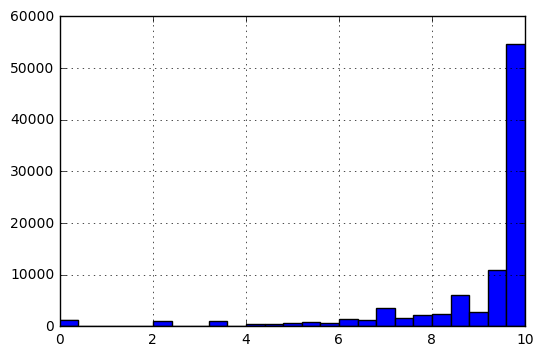

In [23]:
df_Assignment_Event.Grade.hist(bins=25)

In [24]:
df_Assignment_Event.ProblemID.value_counts()

21    17242
7     17034
24    15536
23    13694
5     13541
25     8512
22     8176
4        13
1        13
2         8
3         1
Name: ProblemID, dtype: int64

In [25]:
# removes 1234 which seem to be fake homeworks for testing
print(df_Assignment_Event.shape)
df_Assignment_Event = df_Assignment_Event[df_Assignment_Event.ProblemID>4]
print(df_Assignment_Event.shape)

(93770, 6)
(93735, 6)


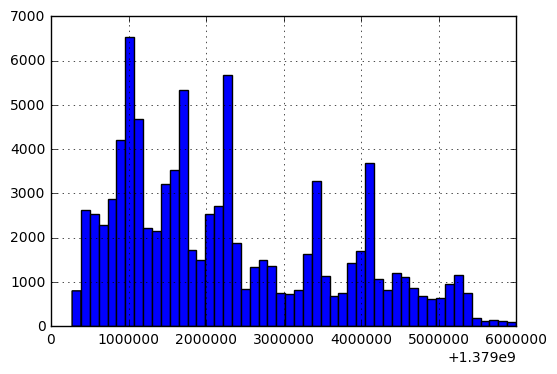

In [36]:
df_Assignment_Event[df_Assignment_Event.TimeStamp<1.385e9].TimeStamp.hist(bins=50)

In [27]:
df_Assignment_Event_sorted = df_Assignment_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_Assignment_Event_sorted.head(10)

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
37901,0002237e8792b2891a3373f32c5eb09853d6388d,9.98,1379456090,5,Problem.Check,2013-09-17 22:14:50
76220,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379456218,5,Problem.Check,2013-09-17 22:16:58
41503,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379458922,7,Problem.Check,2013-09-17 23:02:02
34371,0002237e8792b2891a3373f32c5eb09853d6388d,9.33,1379976032,21,Problem.Check,2013-09-23 22:40:32
82091,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379978239,21,Problem.Check,2013-09-23 23:17:19
56939,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1380577948,24,Problem.Check,2013-09-30 21:52:28
22630,0002237e8792b2891a3373f32c5eb09853d6388d,8.36,1381667913,23,Problem.Check,2013-10-13 12:38:33
15786,0002237e8792b2891a3373f32c5eb09853d6388d,9.55,1381694929,23,Problem.Check,2013-10-13 20:08:49
48712,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1383255384,25,Problem.Check,2013-10-31 21:36:24
18532,0003cbc34de6e50ae7dee801ebbb1ba9e817681d,10.00,1379468548,5,Problem.Check,2013-09-18 01:42:28


In [28]:
# The index has gone crazy, useless, but we can reset it !
df_Assignment_Event_sorted.reset_index(drop=True, inplace=True)
df_Assignment_Event_sorted.head(10)

,SessionUserID,Grade,TimeStamp,ProblemID,EventType,Date
0,0002237e8792b2891a3373f32c5eb09853d6388d,9.98,1379456090,5,Problem.Check,2013-09-17 22:14:50
1,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379456218,5,Problem.Check,2013-09-17 22:16:58
2,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379458922,7,Problem.Check,2013-09-17 23:02:02
3,0002237e8792b2891a3373f32c5eb09853d6388d,9.33,1379976032,21,Problem.Check,2013-09-23 22:40:32
4,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1379978239,21,Problem.Check,2013-09-23 23:17:19
5,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1380577948,24,Problem.Check,2013-09-30 21:52:28
6,0002237e8792b2891a3373f32c5eb09853d6388d,8.36,1381667913,23,Problem.Check,2013-10-13 12:38:33
7,0002237e8792b2891a3373f32c5eb09853d6388d,9.55,1381694929,23,Problem.Check,2013-10-13 20:08:49
8,0002237e8792b2891a3373f32c5eb09853d6388d,10.00,1383255384,25,Problem.Check,2013-10-31 21:36:24
9,0003cbc34de6e50ae7dee801ebbb1ba9e817681d,10.00,1379468548,5,Problem.Check,2013-09-18 01:42:28


In [29]:
# found this here: 
# http://stackoverflow.com/questions/19530568/can-pandas-groupby-aggregate-into-a-list-rather-than-sum-mean-etc
# the big idea is to be able to manipulate the tuples with something like apply(func) later on.
df_Assignment_Event_sorted.groupby(['SessionUserID','ProblemID']).agg(lambda x: tuple(x)).head(19)

Grade  \
SessionUserID                            ProblemID                                         
0002237e8792b2891a3373f32c5eb09853d6388d 5                         (9.97999954224, 10.0)   
                                         7                                       (10.0,)   
                                         21                        (9.32999992371, 10.0)   
                                         23               (8.35999965668, 9.55000019073)   
                                         24                                      (10.0,)   
                                         25                                      (10.0,)   
0003cbc34de6e50ae7dee801ebbb1ba9e817681d 5                                       (10.0,)   
                                         7                                       (10.0,)   
                                         21                        (9.97999954224, 10.0)   
000491411c1ce97b50359c971a935c71f72d5dd1 5                              (3.32999992371,)   
                                         7          (9.57999992371, 9.57999992371, 10.0)   
000b22f5ddf8947c5b36082fbdf7657cef83d28a 7                              (9.80000019073,)   
00241f6235827b4de729c204bfcd35763f482410 7                (9.57999992371, 9.57999992371)   
002839c05f5aa460b840f81585e341b8941b232c 5                   (8.67000007629, 10.0, 10.0)   
                                         7                                       (10.0,)   
                                         21                        (8.31000041962, 10.0)   
                                         22                        (9.64999961853, 10.0)   
                                         23                                      (10.0,)   
                                         24                                      (10.0,)   

                                                                               TimeStamp  \
SessionUserID                            ProblemID                                         
0002237e8792b2891a3373f32c5eb09853d6388d 5                      (1379456090, 1379456218)   
                                         7                                 (1379458922,)   
                                         21                     (1379976032, 1379978239)   
                                         23                     (1381667913, 1381694929)   
                                         24                                (1380577948,)   
                                         25                                (1383255384,)   
0003cbc34de6e50ae7dee801ebbb1ba9e817681d 5                                 (1379468548,)   
                                         7                                 (1379886314,)   
                                         21                     (1380421319, 1380421495)   
000491411c1ce97b50359c971a935c71f72d5dd1 5                                 (1379425798,)   
                                         7          (1379864616, 1379865673, 1379867238)   
000b22f5ddf8947c5b36082fbdf7657cef83d28a 7                                 (1380033581,)   
00241f6235827b4de729c204bfcd35763f482410 7                      (1380059427, 1380102400)   
002839c05f5aa460b840f81585e341b8941b232c 5          (1379785574, 1379786030, 1379871690)   
                                         7                                 (1379788062,)   
                                         21                     (1379960627, 1379963538)   
                                         22                     (1383394948, 1383396192)   
                                         23                                (1381086260,)   
                                         24                                (1380906958,)   

                                                                                        EventType  \
SessionUserID                            ProblemID                                                  
0002237e8792b28

### Video Events

In [30]:
# Need to make sense out of these event types
df_Video_Event.EventType.value_counts()

Video.Seek           2664248
Video.Play           2221592
Video.Pause          1979796
Video.SpeedChange    1291352
Video.Load            673020
Video.Download        451310
Video.Stalled         208316
Video.Error            90127
Name: EventType, dtype: int64

In [31]:
counts = df_Video_Event.SessionUserID.value_counts()
print("Average number of video event per student: %f" % counts.mean())
counts.head(10)

Average number of video event per student: 291.089669


071595118ab0975ac4ebb2b7c9324f7b20b54d1c    21402
fc6602de8ded6cc166f4090a832995281b281d80    17095
03632775e3be3ffd7e2588c701d8e481f7905949    12436
8af73845bdb2e1eb56fcac3f5e297b0fc34f8ebc    11719
de7967fd6151f717b4f24cc0668c92b2481ac356    11678
91df1e1461722cbb4aa61d5ae286fe98f82e7a39    11676
9ad21054193e3895e2b2a00235ad9c6304917515    11245
829a573901d78a82fbd90506805f28ebf66ad9a4     9999
71a424d548d206ed6e51aa98f5efe93875b13523     9982
9d01503705d8dc2905dbf23609b6b0f49547769c     9023
Name: SessionUserID, dtype: int64

[  1   2   3   4   5   6   7   8  14  15  16  17  18  20  21  22  23  24
  25  26  27  29  30  33  34  35  36  37  38  39  40  41  43  44  47  48
  49  51  52  53  54  71  73  75  77  79  81  83  85  87  89  91  93  95
  97 101 103 104 105 107 109 111 112 113 115 117 119 121 123 125 127]


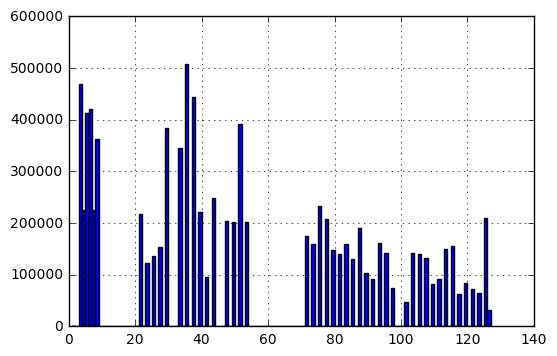

In [32]:
VideoIdList = df_Video_Event.VideoID.unique()
VideoIdList.sort()
print(VideoIdList)
bins = range(df_Video_Event.VideoID.min(),df_Video_Event.VideoID.max()+1)
df_Video_Event.VideoID.hist(bins=bins)

In [33]:
df_Video_Event_sorted = df_Video_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_Video_Event_sorted.reset_index(drop=True, inplace=True)
df_Video_Event_sorted.head(5)

,SessionUserID,TimeStamp,VideoID,EventType,Date
0,00013c772eb39aea395bc893d9569e298f6e184a,1388682416,27,Video.Load,2014-01-02 17:06:56
1,00013c772eb39aea395bc893d9569e298f6e184a,1388682648,8,Video.Load,2014-01-02 17:10:48
2,00013c772eb39aea395bc893d9569e298f6e184a,1389412268,51,Video.Load,2014-01-11 03:51:08
3,00013c772eb39aea395bc893d9569e298f6e184a,1389549429,21,Video.Load,2014-01-12 17:57:09
4,00013c772eb39aea395bc893d9569e298f6e184a,1389549671,8,Video.Load,2014-01-12 18:01:11


### All Events

In [34]:
df_All_Event_sorted = df_All_Event.sort_values(by=['SessionUserID','TimeStamp'])
df_All_Event_sorted.reset_index(drop=True, inplace=True)
df_All_Event_sorted.head()

,Date,EventType,Grade,ProblemID,SessionUserID,TimeStamp,VideoID,EventTypeMain,EventTypeDetail
0,2014-01-02 17:06:56,Video.Load,NaN,NaN,00013c772eb39aea395bc893d9569e298f6e184a,1388682416,27.0,Video,Load
1,2014-01-02 17:10:48,Video.Load,NaN,NaN,00013c772eb39aea395bc893d9569e298f6e184a,1388682648,8.0,Video,Load
2,2014-01-02 17:22:58,Forum.Load,NaN,NaN,00013c772eb39aea395bc893d9569e298f6e184a,1388683378,NaN,Forum,Load
3,2014-01-02 17:23:08,Forum.Load,NaN,NaN,00013c772eb39aea395bc893d9569e298f6e184a,1388683388,NaN,Forum,Load
4,2014-01-05 15:08:15,Forum.Load,NaN,NaN,00013c772eb39aea395bc893d9569e298f6e184a,1388934495,NaN,Forum,Load
